In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import pearsonr
import pingouin as pg #paquete estadístico de código abierto https://pingouin-stats.org/build/html/index.html

In [17]:
df = pd.read_csv('housing.data', header=None, sep='\s+')
df.columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Datos\AppData\Local\Temp\ipykernel_17632\1211191821.py:1: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv('housing.data', header=None, sep='\s+')


CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

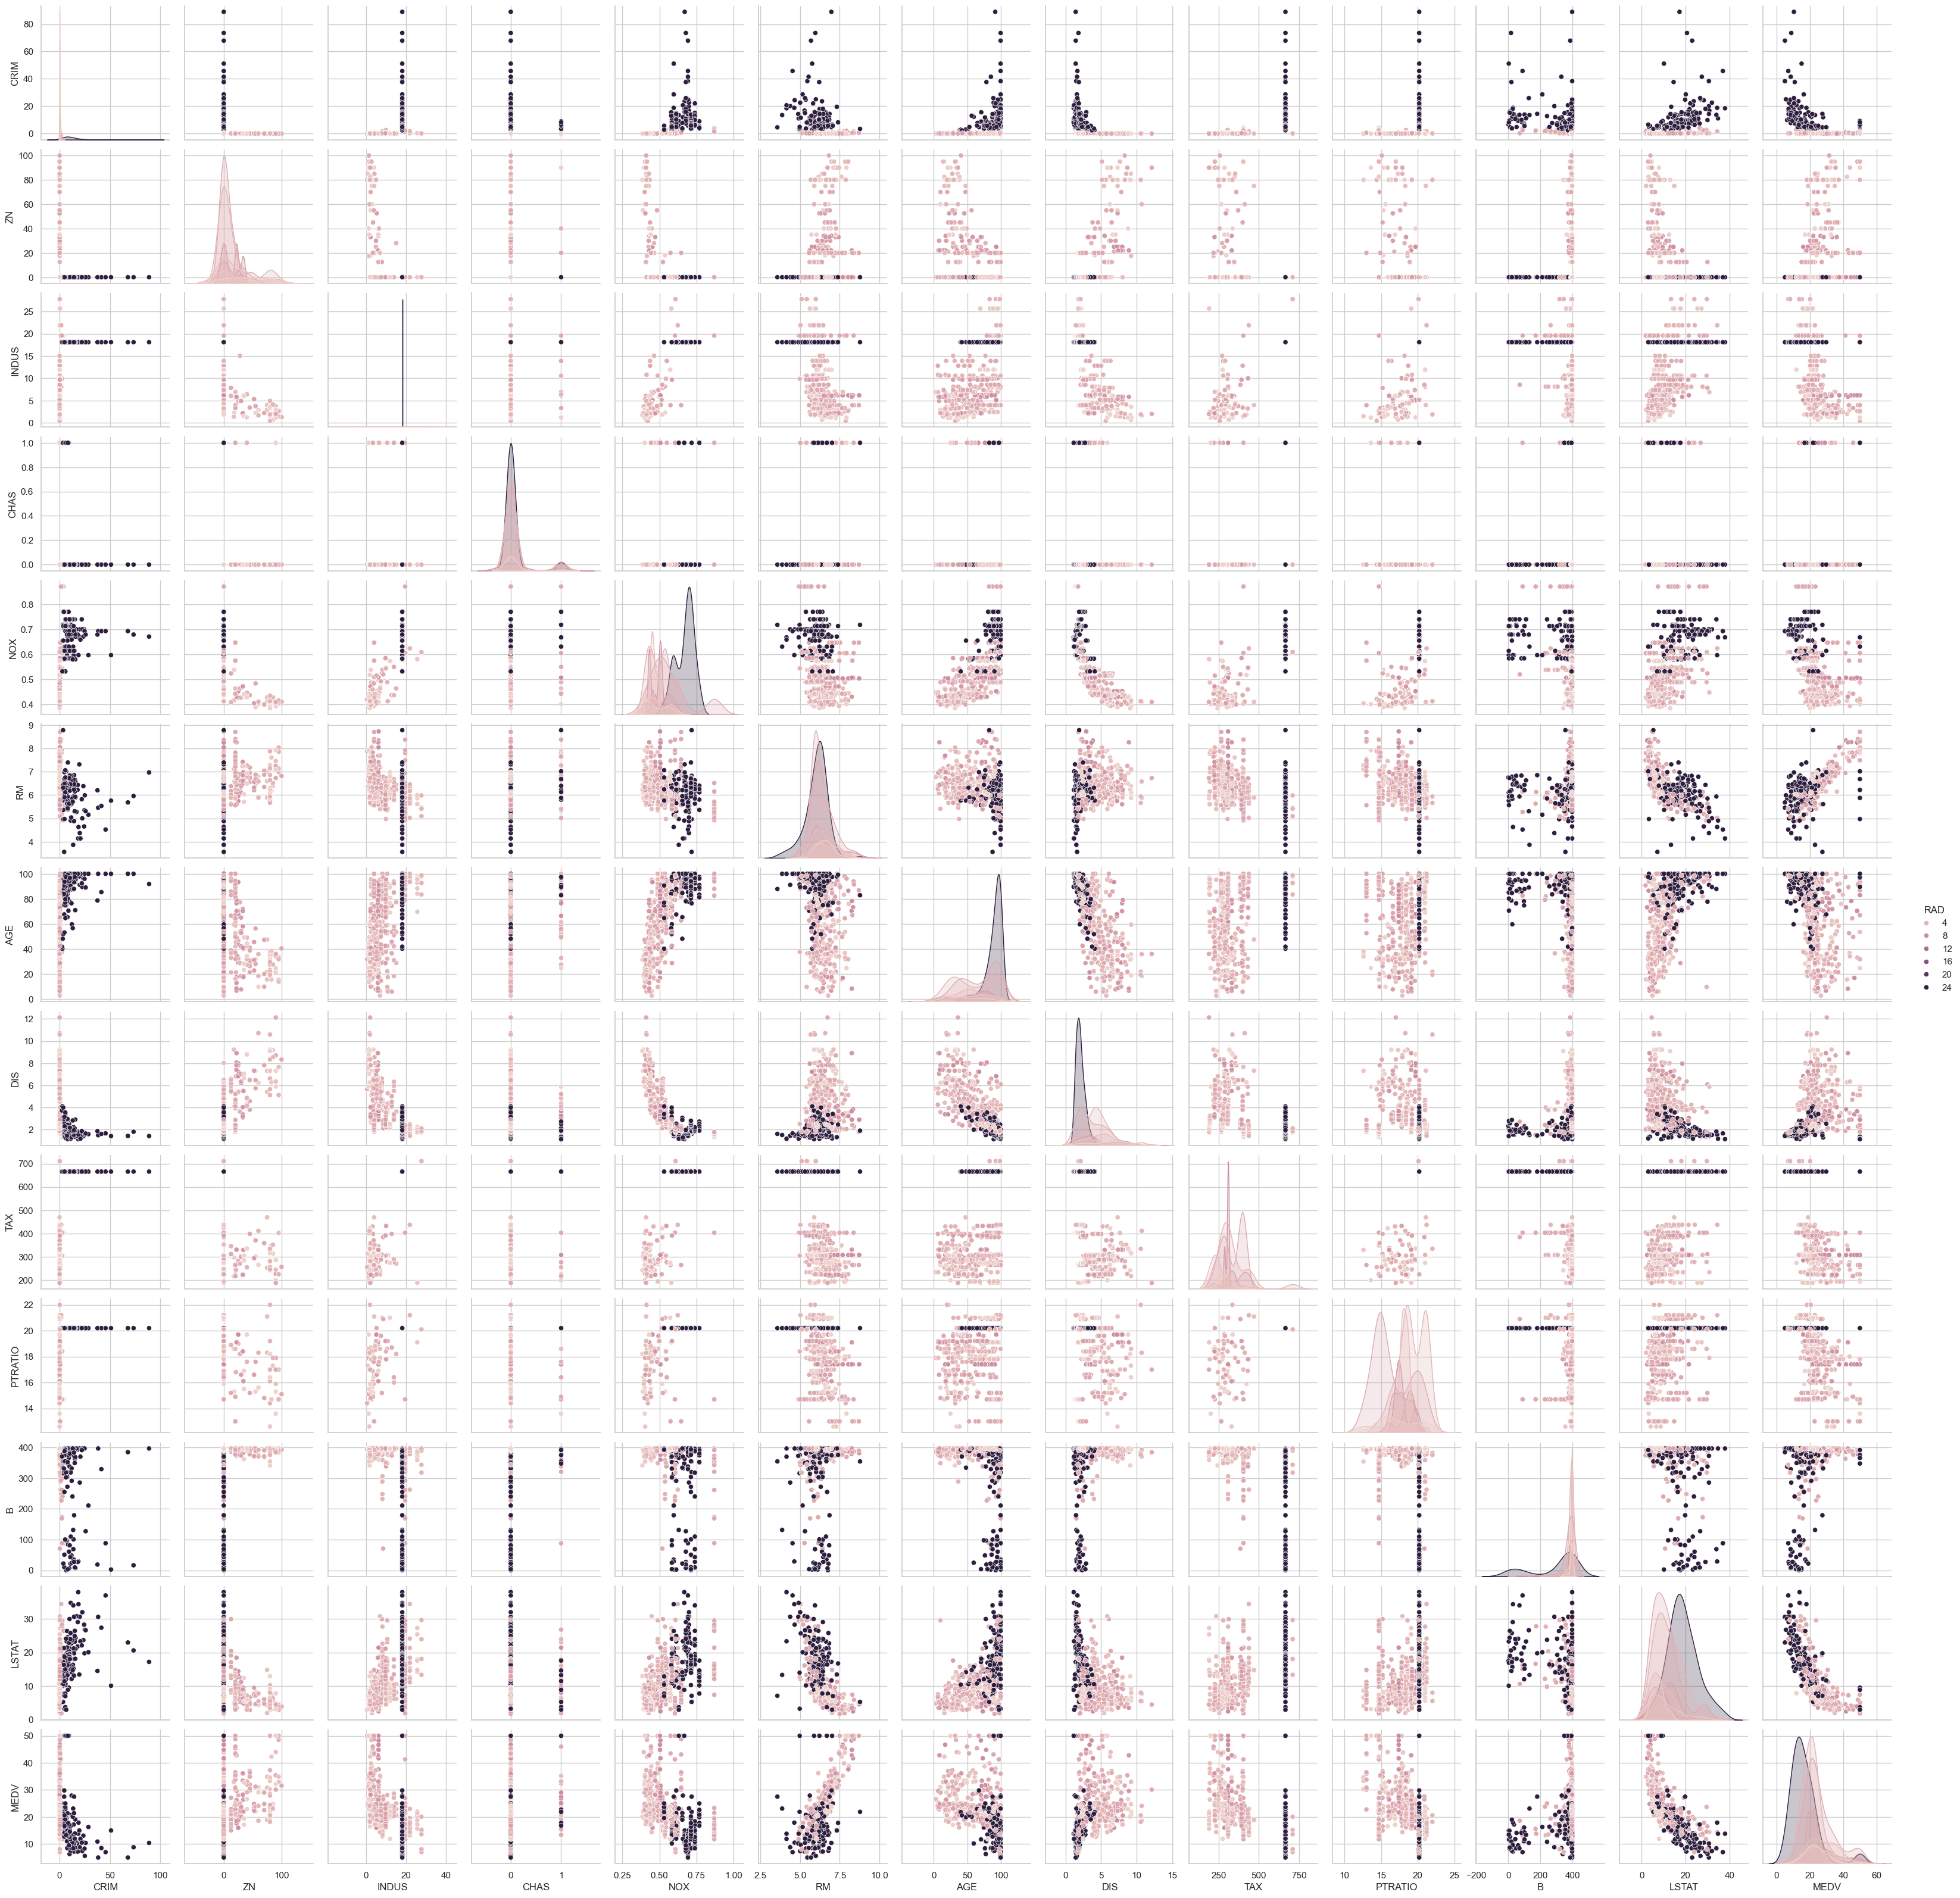

In [20]:
sns.set(style='whitegrid', context='notebook')
cols = ['DIS','INDUS','CRIM', 'RM', 'MEDV', 'RAD']
sns.pairplot(df, height=2.5, hue='RAD')
plt.show()

In [21]:
df.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
MEDV    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
MEDV     0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [22]:
df.corr(method='spearman')

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.571660  0.735524  0.041537  0.821465 -0.309116  0.704140   
ZN      -0.571660  1.000000 -0.642811 -0.041937 -0.634828  0.361074 -0.544423   
INDUS    0.735524 -0.642811  1.000000  0.089841  0.791189 -0.415301  0.679487   
CHAS     0.041537 -0.041937  0.089841  1.000000  0.068426  0.058813  0.067792   
NOX      0.821465 -0.634828  0.791189  0.068426  1.000000 -0.310344  0.795153   
RM      -0.309116  0.361074 -0.415301  0.058813 -0.310344  1.000000 -0.278082   
AGE      0.704140 -0.544423  0.679487  0.067792  0.795153 -0.278082  1.000000   
DIS     -0.744986  0.614627 -0.757080 -0.080248 -0.880015  0.263168 -0.801610   
RAD      0.727807 -0.278767  0.455507  0.024579  0.586429 -0.107492  0.417983   
TAX      0.729045 -0.371394  0.664361 -0.044486  0.649527 -0.271898  0.526366   
PTRATIO  0.465283 -0.448475  0.433710 -0.136065  0.391309 -0.312923  0.355384   
B       -0.360555  0.163135 -0.285840 -0.039810 -0.296662  0.053660 -0.228022   
LSTAT    0.634760 -0.490074  0.638747 -0.050575  0.636828 -0.640832  0.657071   
MEDV    -0.558891  0.438179 -0.578255  0.140612 -0.562609  0.633576 -0.547562   

              DIS       RAD       TAX   PTRATIO         B     LSTAT      MEDV  
CRIM    -0.744986  0.727807  0.729045  0.465283 -0.360555  0.634760 -0.558891  
ZN       0.614627 -0.278767 -0.371394 -0.448475  0.163135 -0.490074  0.438179  
INDUS   -0.757080  0.455507  0.664361  0.433710 -0.285840  0.638747 -0.578255  
CHAS    -0.080248  0.024579 -0.044486 -0.136065 -0.039810 -0.050575  0.140612  
NOX     -0.880015  0.586429  0.649527  0.391309 -0.296662  0.636828 -0.562609  
RM       0.263168 -0.107492 -0.271898 -0.312923  0.053660 -0.640832  0.633576  
AGE     -0.801610  0.417983  0.526366  0.355384 -0.228022  0.657071 -0.547562  
DIS      1.000000 -0.495806 -0.574336 -0.322041  0.249595 -0.564262  0.445857  
RAD     -0.495806  1.000000  0.704876  0.318330 -0.282533  0.394322 -0.346776  
TAX     -0.574336  0.704876  1.000000  0.453345 -0.329843  0.534423 -0.562411  
PTRATIO -0.322041  0.318330  0.453345  1.000000 -0.072027  0.467259 -0.555905  
B        0.249595 -0.282533 -0.329843 -0.072027  1.000000 -0.210562  0.185664  
LSTAT   -0.564262  0.394322  0.534423  0.467259 -0.210562  1.000000 -0.852914  
MEDV     0.445857 -0.346776 -0.562411 -0.555905  0.185664 -0.852914  1.000000

<Axes: >

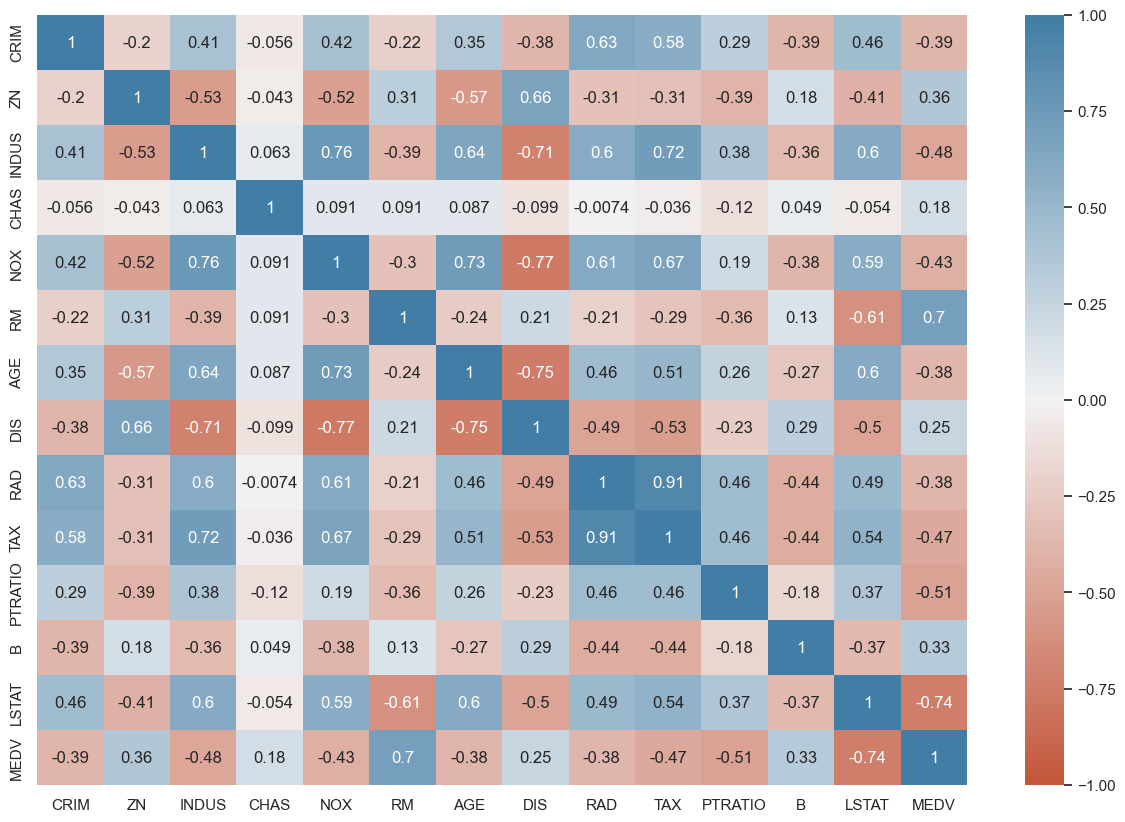

In [23]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(
    data=df.corr(method='pearson'),
    cmap=sns.diverging_palette(20,238, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    annot=True,
)

In [24]:
x=df.RM
y=df.MEDV
corr_mat=np.corrcoef(x,y)
corr_mat[0,1]

np.float64(0.6953599470715395)

In [25]:
# Correlación con outlier
r, p = stats.pearsonr(x, y)
print(f"Correlación Pearson con outlier: r={r}, p-value={p}")

Correlación Pearson con outlier: r=0.6953599470715395, p-value=2.4872288710076306e-74


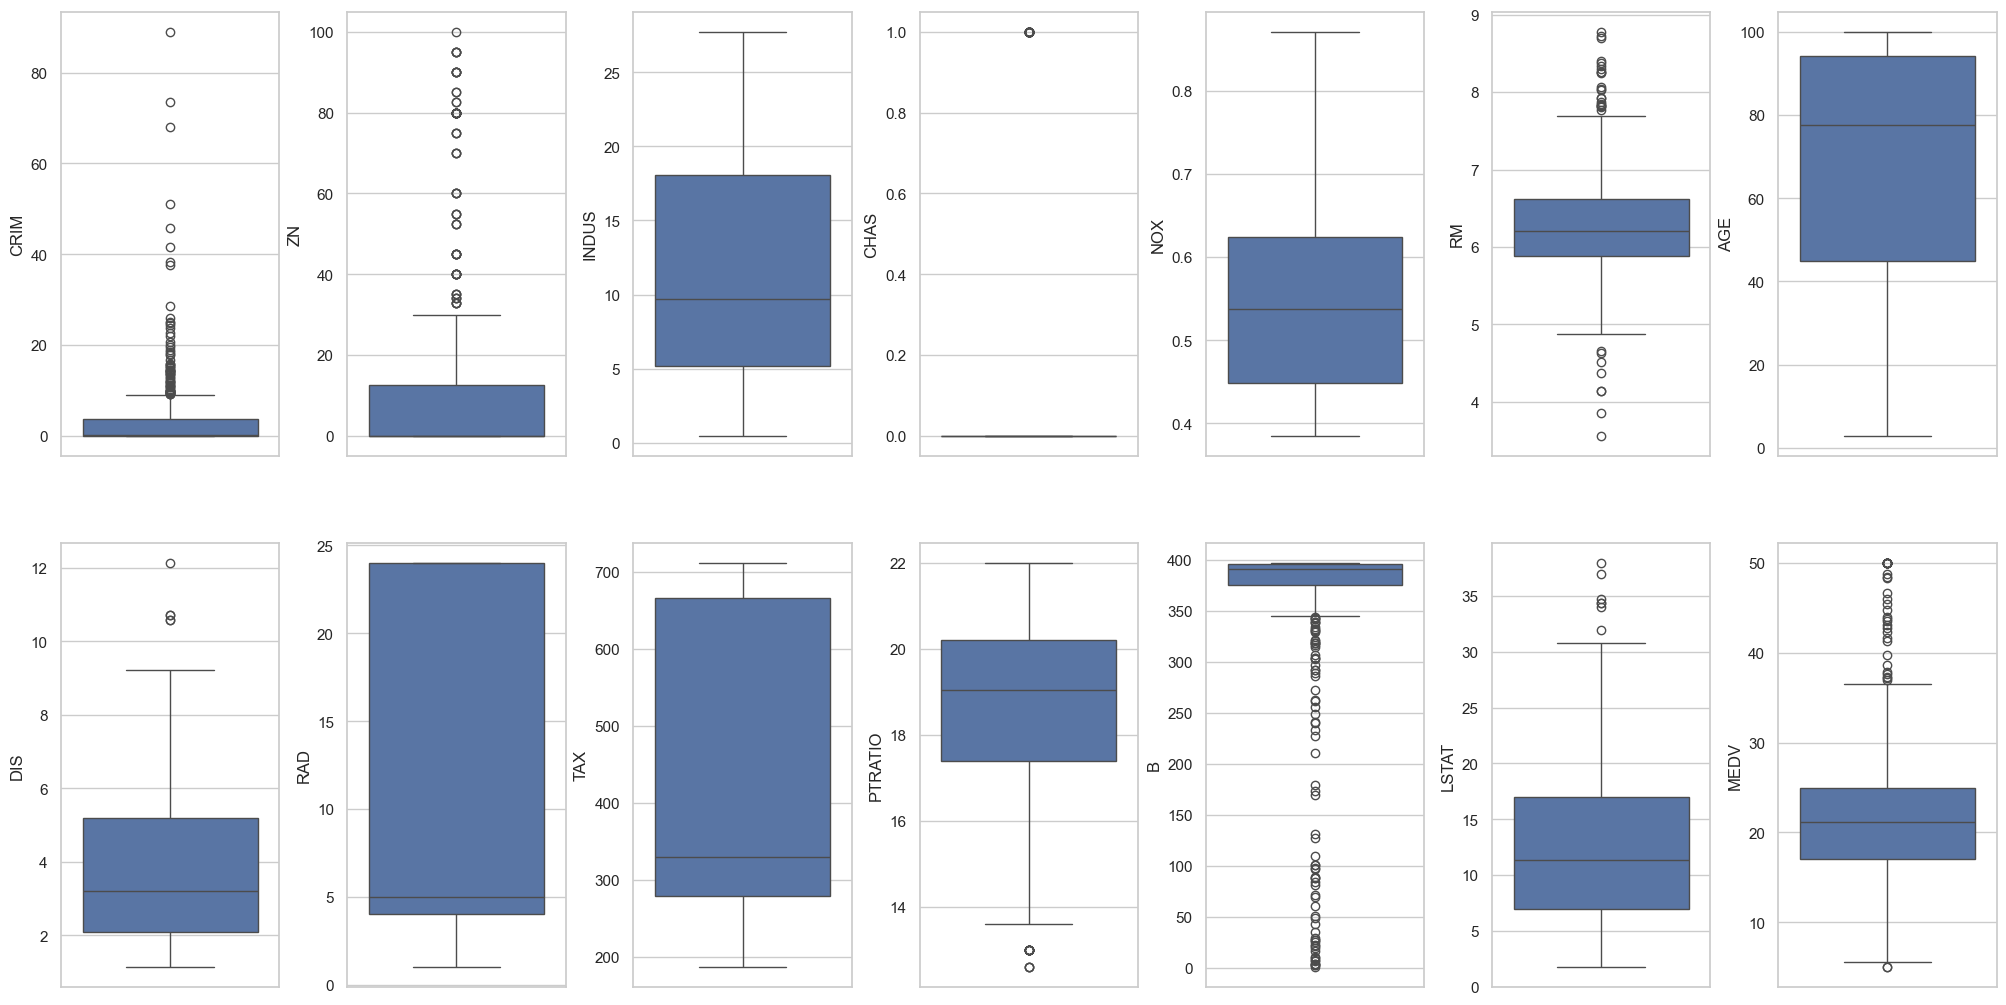

In [26]:
#Como seleccionamos RM como x y MEDV como y
#Verificacmos si existen outliers
#Para diagrama de cajas datos numericos
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k,data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [28]:
 for k, v in df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [36]:
dfo=df[~(df['MEDV'] >= 50.0)]
print(f'dataframe con ouliers {np.shape(df)}')
print(f'dataframe sin ouliers {np.shape(dfo)}')

dataframe con ouliers (506, 14)
dataframe sin ouliers (490, 14)


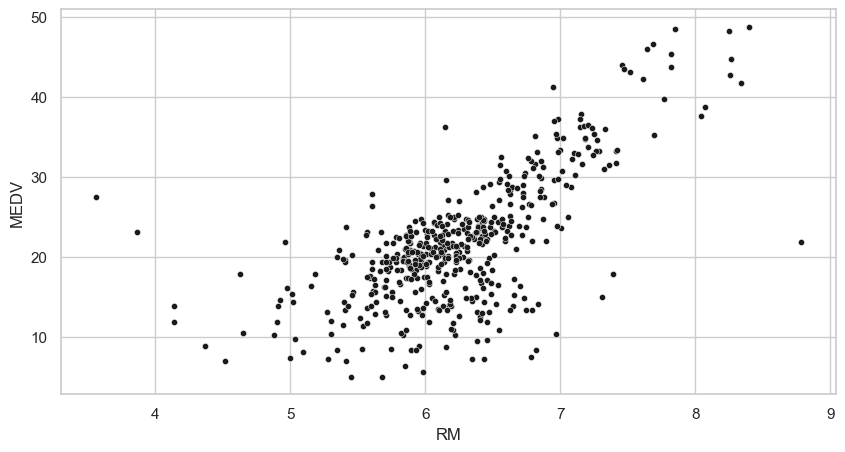

In [37]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=dfo,
    x='RM',
    y='MEDV',
    color='.1',
    s=20
);

In [46]:
pg.corr(x,y)

n        r         CI95%         p-val      BF10  power
pearson  506  0.69536  [0.65, 0.74]  2.487229e-74  5.92e+70    1.0

In [47]:
pg.corr(x, y, method="bicor")


n         r       CI95%         p-val  power
bicor  506  0.651437  [0.6, 0.7]  1.957011e-62    1.0

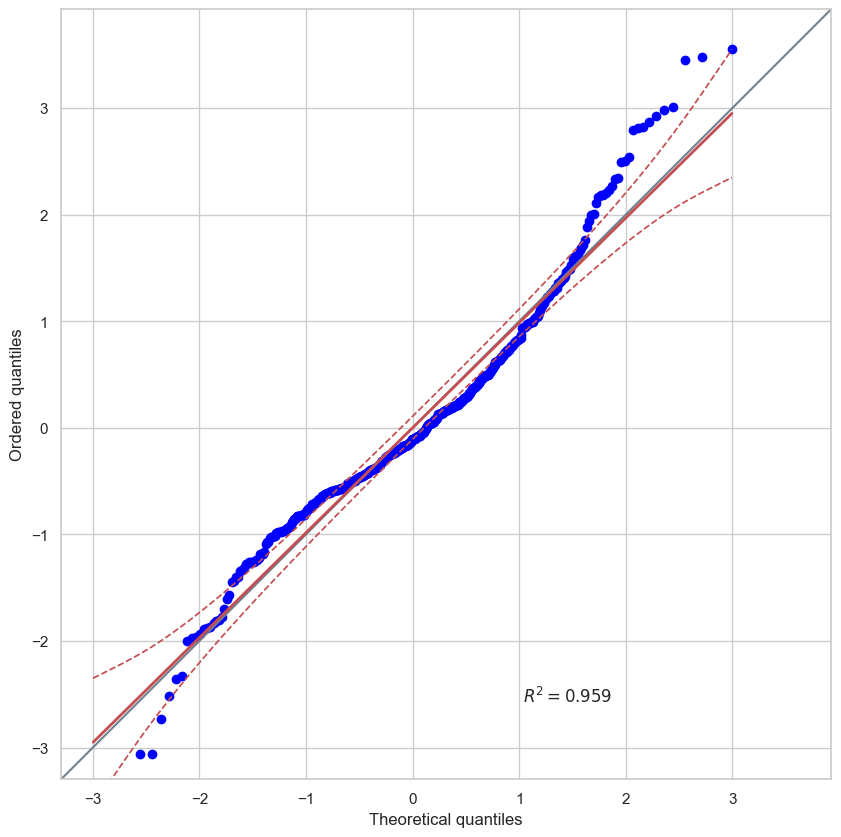

In [48]:
ax = pg.qqplot(x, dist='norm')

In [49]:
pg.ttest(x, y)

T   dof alternative          p-val             CI95%  \
T-test -39.624611  1010   two-sided  6.490168e-208  [-17.05, -15.44]   

         cohen-d        BF10  power  
T-test  2.491178  4.198e+203    1.0

In [50]:
#test de hipotesis
X=dfo.MEDV
Y=dfo.RM
# Calculamos los parámetros del ajuste, a y b, ax+b
ahat, bhat = np.polyfit(X, Y, deg = 1)
# Calculamos los residuos
residuos = Y - (ahat * X + bhat)
# Calculamos la suma cuadrática de los residuos (RSS, residual sum of squares)
RSS = np.sum(residuos**2)
# Calculamos el error estándar de los residuos (RSE, residual standard error)
RSE = np.sqrt(RSS/(len(X)-2))
# Error estándar de la estimación de la pendiente
SEa = np.sqrt(RSE**2 / np.sum((X - X.mean())**2))
# Calculamos el estadístico t
t = ahat / SEa
# Calculamos el p-valor
# Aquí estamos usando scipy.stats 
# donde metemos los grados de libertad (len(X) - 2) 
# y calculamos la CDF del valor t
# Como calculamos la CDF y solo obtenemos una de las 
# colas lo multiplicamos por dos para considerar ambos extremos
p = 2 * (1 - stats.t(len(X) - 2).cdf(t))

print('Valor de la pendiente estimada, a = ', ahat)
print('RSS = ', RSS)
print('RSE = ', RSE)
print('Error estándar = ', SEa)
print('Valor de t = ', t)
print('Valor de p = ', p)

Valor de la pendiente estimada, a =  0.05701921908026274
RSS =  110.25631028193722
RSE =  0.4753262690543728
Error estándar =  0.002732889272479756
Valor de t =  20.86407951264155
Valor de p =  0.0


<Axes: >

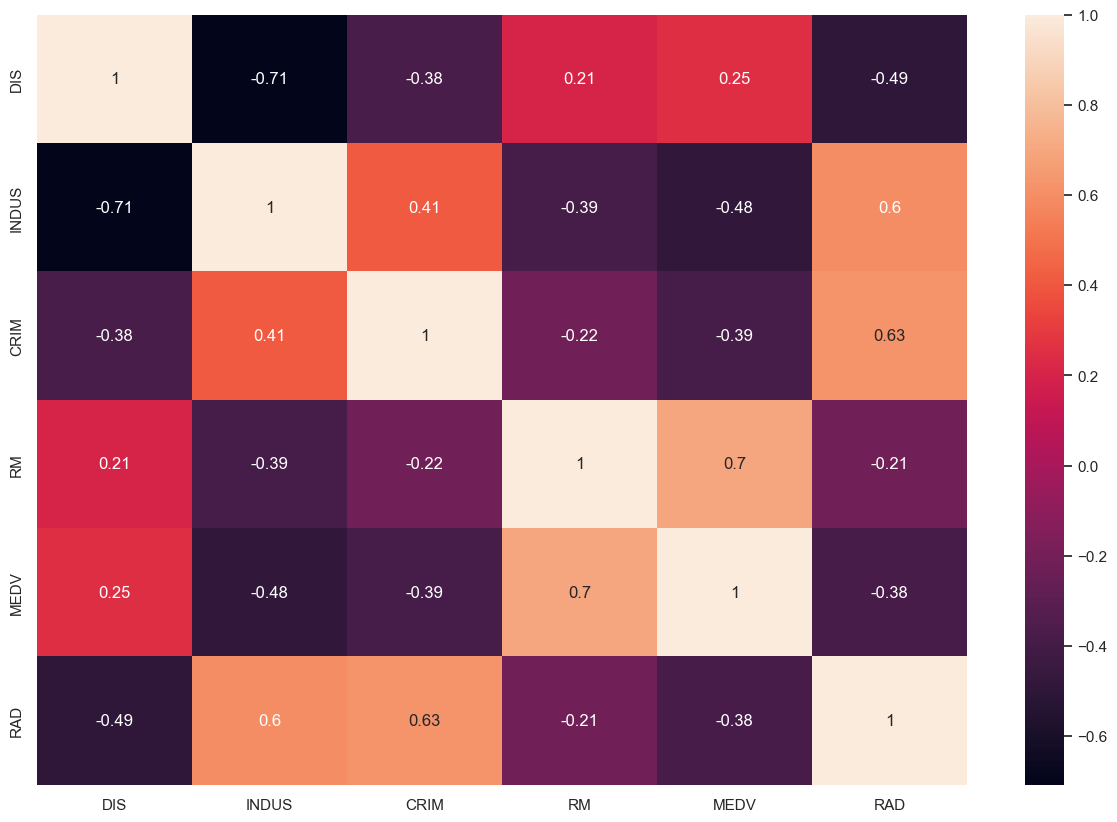

In [51]:
sns.heatmap(
    data=df[cols].corr(), 
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [52]:
# StandardScaler acepta arreglos de 2 dimensiones por lo cual ya no usamos el reshape(-1,1) con la variable independiente (X)
X = df[['RM', 'INDUS']].values 
y = df['MEDV'].values.reshape(-1,1)

In [53]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_standard = sc_x.fit_transform(X)
y_standard = sc_y.fit_transform(y)

In [54]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_standard,y_standard)

LinearRegression()

In [55]:
# definir el rango de valores para la variable predictiva "RM"
x1_range = np.arange(
    df['RM'].min(),
    df['RM'].max())

# definir el rango de valores para la variable predictiva "INDUS"
x2_range = np.arange(
    df['INDUS'].min(),
    df['INDUS'].max())

# crear una malla de puntos que cubra los rangos de valores de ambas variables predictoras
X1, X2 = np.meshgrid(x1_range, x2_range)

In [56]:
# crear un dataframe con todas las combinaciones posibles de valores de ambas variables predictoras
plano = pd.DataFrame(
    {
    'RM':X1.ravel(), 
    'INDUS':X2.ravel()
    })
plano.T

0      1      2      3      4      5      6      7      8      9    \
RM     3.561  4.561  5.561  6.561  7.561  8.561  3.561  4.561  5.561  6.561   
INDUS  0.460  0.460  0.460  0.460  0.460  0.460  1.460  1.460  1.460  1.460   

       ...     158     159     160     161     162     163     164     165  \
RM     ...   5.561   6.561   7.561   8.561   3.561   4.561   5.561   6.561   
INDUS  ...  26.460  26.460  26.460  26.460  27.460  27.460  27.460  27.460   

          166     167  
RM      7.561   8.561  
INDUS  27.460  27.460  

[2 rows x 168 columns]

In [57]:
# utilizar los coeficientes y la intercepción del modelo de regresión lineal múltiple ajustado para hacer predicciones en el plano creado
pred = slr.predict(plano).reshape(X1.shape)

# escalar las predicciones inversamente utilizando el objeto sc_y para obtener los valores reales de la variable de respuesta "MEDV"
pred = sc_y.inverse_transform(pred)

D:\2024-2\Machin-Learning\envmachin-learning\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [60]:
import plotly.express as px
import plotly.graph_objects as go

# PLOTTING
mesh_size = .02
margin = 0

fig = px.scatter_3d(df, x='RM', y='INDUS', z='MEDV')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=X1, y=X2, z=pred, name='pred_surface'))
fig.show()

In [62]:
pred = slr.predict(plano).reshape(X1.shape)
pred = sc_y.inverse_transform(pred)

D:\2024-2\Machin-Learning\envmachin-learning\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but LinearRegression was fitted without feature names



In [66]:
nhab=5
indus=1
prediction = slr.predict([[nhab, indus]])
print(f'RSTA: : Para un numero de habitaciones{nhab}, industrias {indus}, precio: {prediction} milllones' )

RSTA: : Para un numero de habitaciones5, industrias 1, precio: [[2.73817654]] milllones
